# Women Enterprenuer and Labour Prediction with Machine learning

In [13]:
#import the libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the file from the directory 

data = pd.read_csv('women_dataset.csv')
data.head()

,No;Country;Level of development;European Union Membership;Currency;Women Entrepreneurship Index;Entrepreneurship Index;Inflation rate;Female Labor Force Participation Rate
0,4;Austria;Developed;Member;Euro;54.9;64.9;0.9;...
1,6;Belgium;Developed;Member;Euro;63.6;65.5;0.6;58
2,17;Estonia;Developed;Member;Euro;55.4;60.2;-0....
3,18;Finland;Developed;Member;Euro;66.4;65.7;-0....
4,19;France;Developed;Member;Euro;68.8;67.3;0;60.6


ok..! so this dataset is delimited or separated by ';' . we need to change modify our previous line of code

In [3]:
data = pd.read_csv('women_dataset.csv', sep=';')
data.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


Yep... that looks good now ! 

In [5]:
#let us check the shape of the dataset 

data.shape

(51, 9)

ok.. so the data is so small.. it has only 51 rows and 9 colunms 

let us check the features information in the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


let us also check the statistical information about the dataset ..! 

In [7]:
data.describe()

,No,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,29.980392,47.835294,47.241176,2.587647,58.481765
std,18.017203,14.268480,16.193149,5.380639,13.864567
min,1.000000,25.300000,24.800000,-2.250000,13.000000
25%,14.500000,36.350000,31.900000,-0.500000,55.800000
50%,30.000000,44.500000,42.700000,0.600000,61.000000
75%,45.500000,59.150000,65.400000,3.600000,67.400000
max,60.000000,74.800000,77.600000,26.500000,82.300000


In [11]:
data.describe().columns

Index(['No', 'Women Entrepreneurship Index', 'Entrepreneurship Index',
       'Inflation rate', 'Female Labor Force Participation Rate'],
      dtype='object')

Now let us check if any of the value in the dataset is empty or NULL

In [12]:
data.isnull().sum()

No                                       0
Country                                  0
Level of development                     0
European Union Membership                0
Currency                                 0
Women Entrepreneurship Index             0
Entrepreneurship Index                   0
Inflation rate                           0
Female Labor Force Participation Rate    0
dtype: int64

So not a single row has NULL value.. that's good..! 

We need to undertand the dataset with all respects.. so we will do some more manipulations...!

In [19]:
data.Country.value_counts()

Slovakia                  1
Greece                    1
Japan                     1
France                    1
Algeria                   1
Thailand                  1
Mexico                    1
Jamaica                   1
Turkey                    1
Netherlands               1
Iceland                   1
Singapore                 1
Brazil                    1
Lithuania                 1
El Salvador               1
Australia                 1
Belgium                   1
Hungary                   1
Spain                     1
Denmark                   1
Tunisia                   1
Ireland                   1
Bolivia                   1
Taiwan                    1
Russia                    1
Peru                      1
Argentina                 1
Austria                   1
Sweden                    1
Bosnia and Herzegovina    1
Panama                    1
Uruguay                   1
Switzerland               1
Estonia                   1
Ecuador                   1
Italy               

So the dataset has countries from Europe, Africa and Asia..! 
the dataset has categorical values as well.. let us separate those and numericals

In [68]:
categorical_data = data.select_dtypes(exclude=[np.number])

In [69]:
categorical_data.head()

,Country,Level of development,European Union Membership,Currency
0,Austria,Developed,Member,Euro
1,Belgium,Developed,Member,Euro
2,Estonia,Developed,Member,Euro
3,Finland,Developed,Member,Euro
4,France,Developed,Member,Euro


In [26]:
#let us see the developed and developing countries here. 

Developed 27
Developing 24


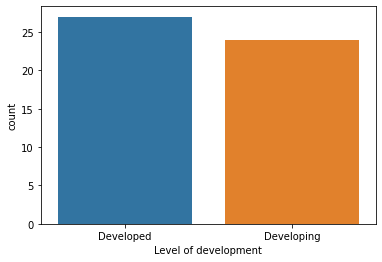

In [31]:
sns.countplot(data=categorical_data,x="Level of development")
Developed,Developing=categorical_data["Level of development"].value_counts()
print("Developed", Developed)
print("Developing", Developing)
plt.show()

In [38]:
categorical_data['Currency'].value_counts()

National Currency    36
Euro                 15
Name: Currency, dtype: int64

Euro 15
National Currency 36


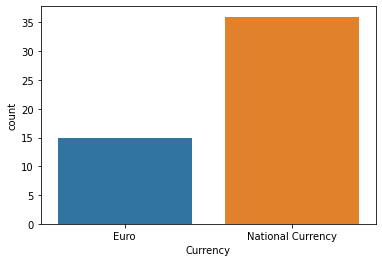

In [70]:
#we can also see according to currency

sns.countplot(data=categorical_data,x="Currency")
National, Euro=categorical_data["Currency"].value_counts()
print("Euro", Euro)
print("National Currency", National)
plt.show()

Not a Member 20
Member 31


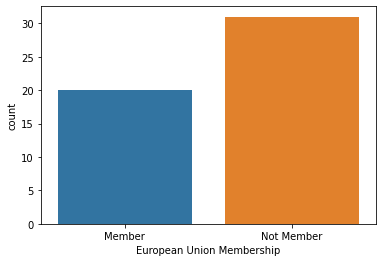

In [71]:
#we can also see according to EU membership

sns.countplot(data=categorical_data,x="European Union Membership")
Member,Not_Member=categorical_data["European Union Membership"].value_counts()
print("Not a Member", Not_Member)
print("Member", Member)

plt.show() 

In [72]:
num_data = data.select_dtypes(include=[np.number])

Country-wise Women Enterprenurship Index

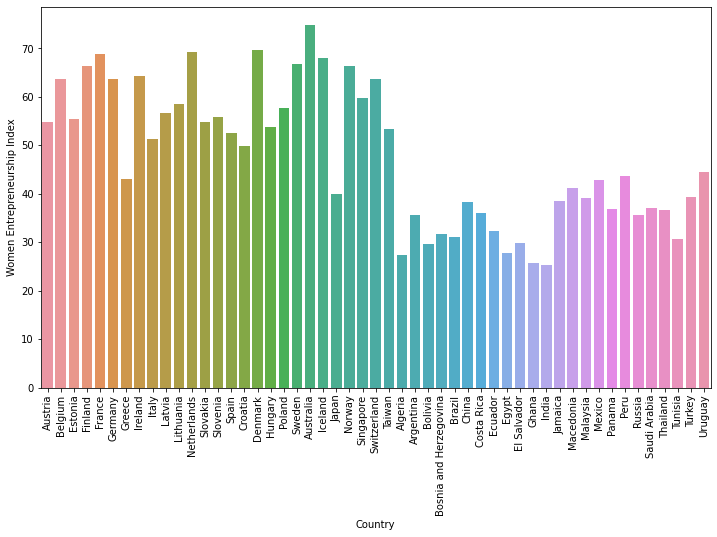

In [73]:
plt.figure(figsize = (12,7))
sns.barplot(x = categorical_data.Country, y = num_data['Women Entrepreneurship Index'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
Let us do Machine Learning Now